## Model information

The model object contains information about the model itself, its name, its structure (does it contain simultaneous equations or is it recursive), the number of variables it contains and the number that are exogenous and endogenous (have associated equations).

In [1]:
mpak

NameError: name 'mpak' is not defined

The model work space also has a time dimension, its sample period. This can be retrieved and changed.

`mpak.per_current'

In [ ]:
mpak.model_description="World Bank climate aware model of Pakistan as described in Burns et al. (2019)"
mpak.model_description
mpak.periode=2100


## Model structure  

A model has a well defined logical and causal structure.{cite:author}`kogiku_introduction_1968`provides an introduction to causal analysis of models can be found in {cite:author}`kogiku1968`(1968), while {cite:author}`berndsen_causal_1995` provides a more elaborate discussion. 

At the simplest level, the equations of a model can be organized into blocks. 

* **Simultaneous block** include equations that have are co-determined simultaneously. They contain feedback loops that mean they may require several iterations before a solution that satisfies them all is found. A classic simultaneous block would include GDP and Consumption. Consumption depends on income. Income depends on GDP, but COnsumption determines GDP. 

* **Recursive blocks** include equations that are a simple function of other variables. For example, the current account balance is just the difference between Export Revenues and Import Revenues.  These can be solved with just one pass once the values of the simultaneous blocks have been resolved.

`Modelflow` uses the [networkx](https://networkx.org/) python package to analyze the interrelation ships between equations and includes a number of methods and properties to present these interrelationships both in tabular anr graphical form [^Graphvix], a subset of which is exposed in this chapter. 

[^Graphviz]: The relational graphs produced by `modelflow` use the [Graphviz](https://graphviz.org/) program, and are based on the relationships determined by the Networkx package. 

## Setting up the python environment and loading a pre-exisitng model

In [3]:
from modelclass import model
%load_ext autoreload
%autoreload 2

mpak,baseline = model.modelload('../models/pak.pcim',alfa=0.7,run=1)

file read:  C:\mflow\modelflow-manual\papers\mfbook\content\models\pak.pcim


Perform a quick simulation, imposing a nominal carbon tax at $30 beginning in 2025.

In [4]:

alternative  =  baseline.upd("<2025 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 29")
result = mpak(alternative,2020,2100) # simulates the model 

## Trace upstream variables: 
Lets look at The equation for **GDP**

In [5]:
mpak.PAKNYGDPMKTPKN.frml

Endogeneous: PAKNYGDPMKTPKN: Real GDP
Formular: FRML <IDENT> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $

PAKNYGDPMKTPKN: Real GDP
PAKADAP       : 
PAKDISPREPKN  : 
PAKNECONGOVTKN: Gov. Cons real
PAKNECONPRVTKN: HH. Cons Real
PAKNEEXPGNFSKN: Exports real
PAKNEGDIFTOTKN: Investment real
PAKNEGDISTKBKN: Stock real
PAKNEIMPGNFSKN: Imports real
PAKNYGDPDISCKN: GDP Disc., 2000 LCU mn




### The incoming variables can be displayed as a graph
That is, the preceding variables on the right hand side of the equation for GDP is shown as a directed graph. The width of the arrow reflect how much of the impact can be attributed to this variable. 

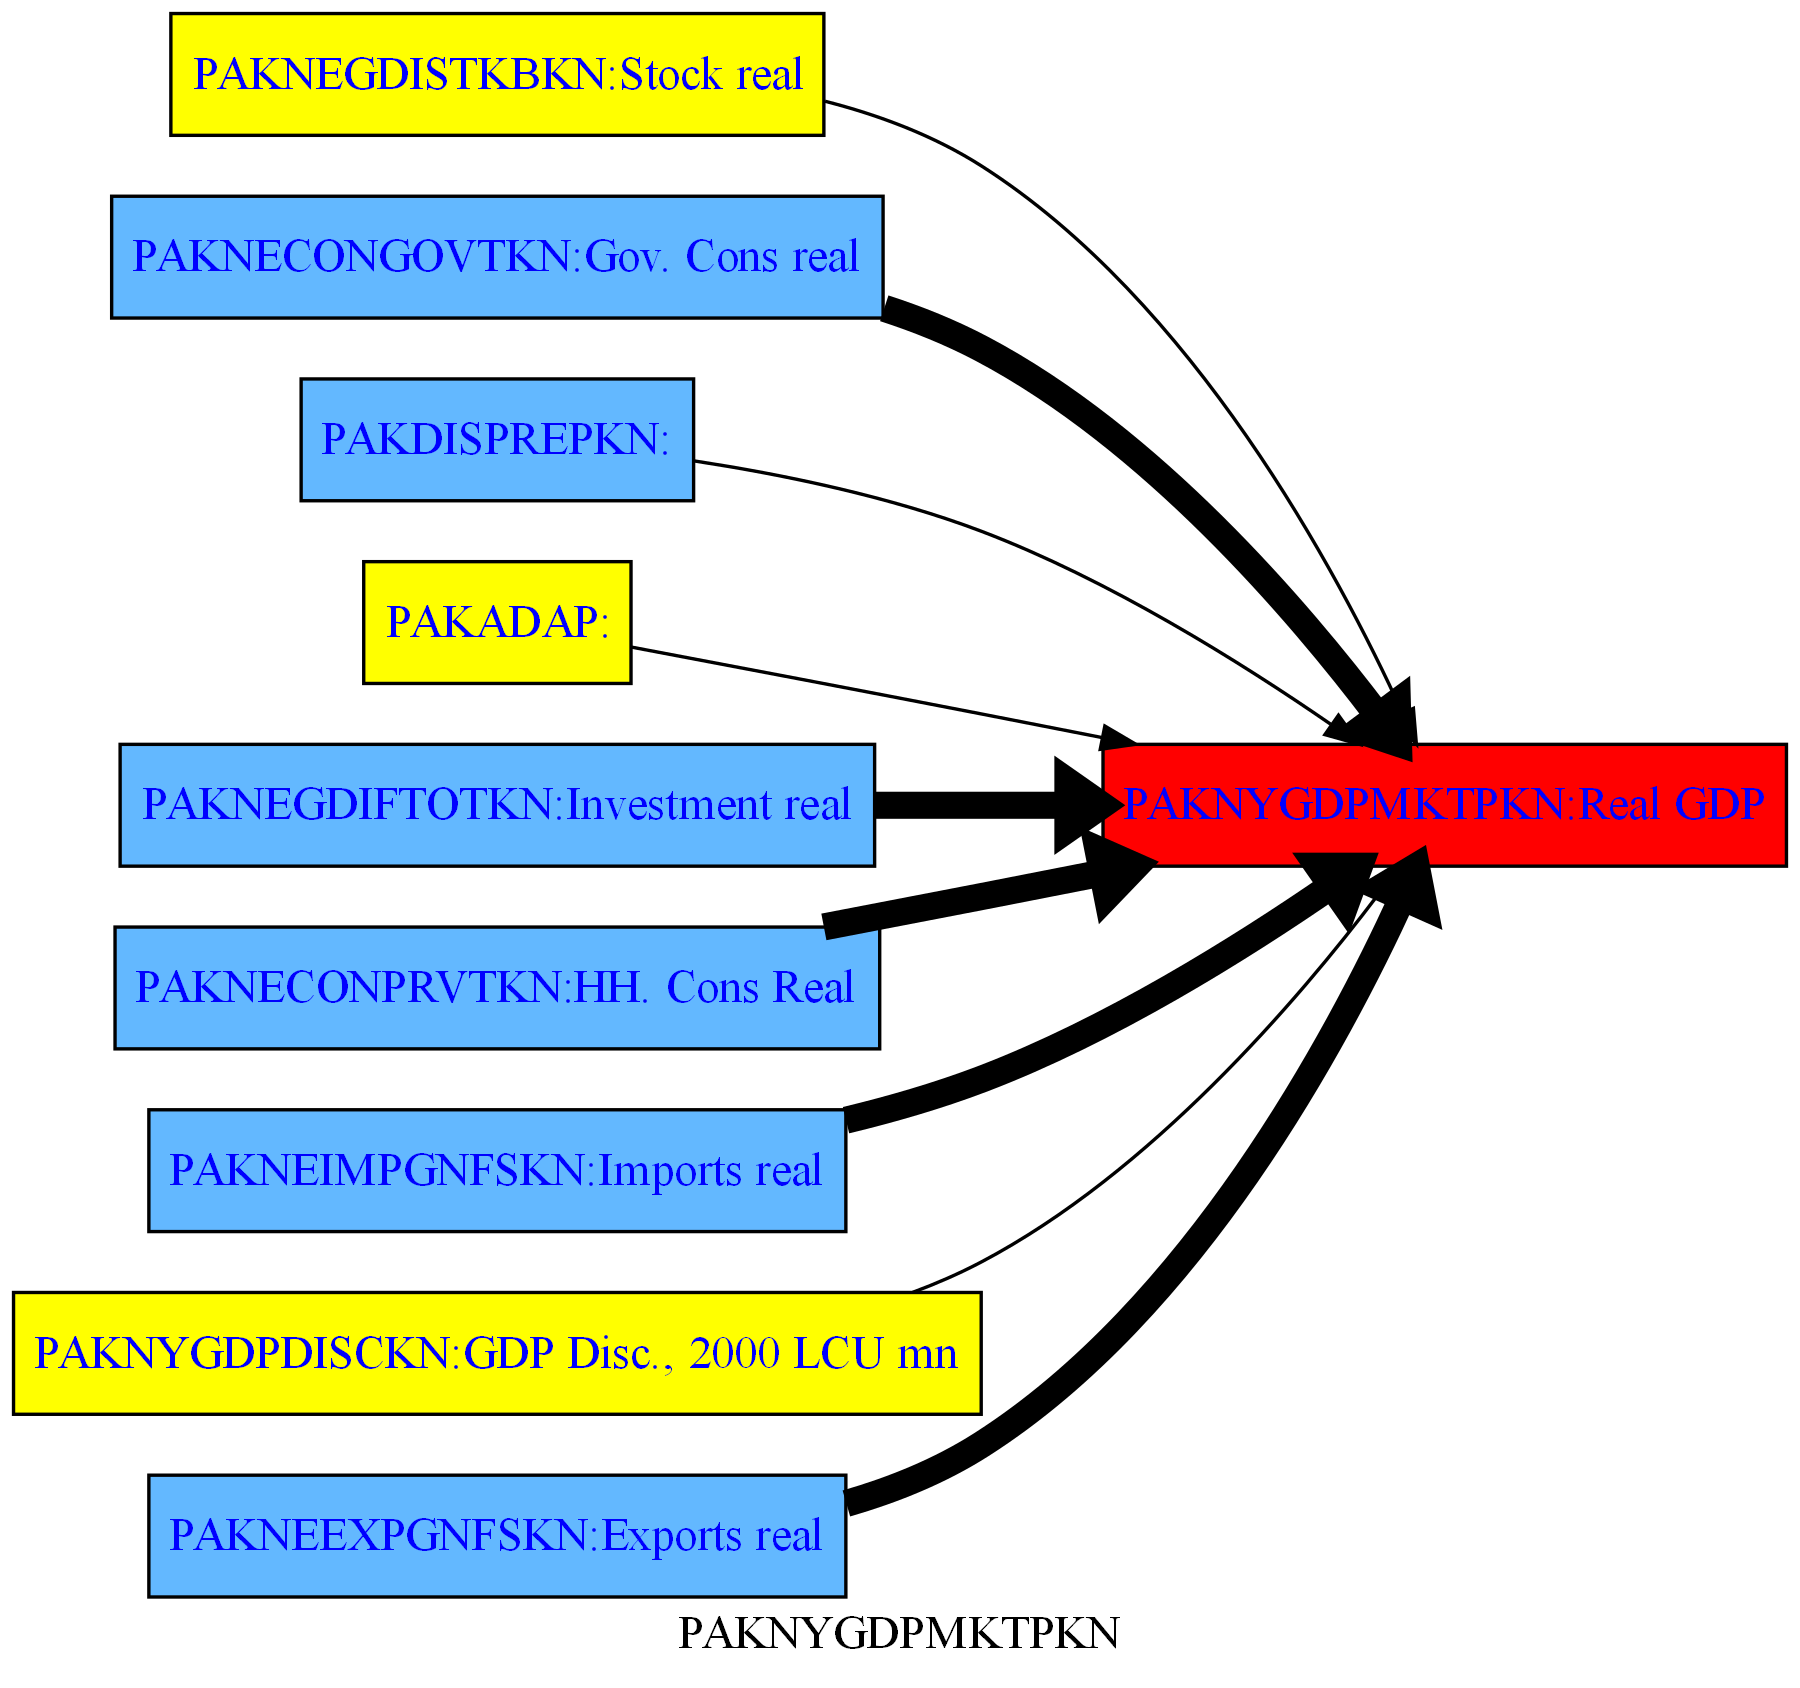

In [7]:
latex=1
mpak.PAKNYGDPMKTPKN.tracepre(png=latex)

:::{note}
**png=latex** 

The default behavior when displaying graphs in a *jupyter notebook* is to produce images in .svg format.
These images scale well and the mouseover
feature can be used. That is: On mouseover of a node, the variable and the equation are displayed. 
On mouseover on an edge the percent attribution for this variable is displayed

Unfortunately this *jupyter book* (that is not a notebook) can not be build into a latex and PDF  form using images in svg format.

When a  pdf file is created, the latex variable has to be set to True. If this notebook is used as a notebook set latex=0 and use the mouseover feature.
:::

### .tracepre(,,,filter=\<minimal impact>) Pruning the tree
Not all preceding variables have impact. By using filter=\<minimal impact> only  links where the minimal impact is more than \<minimal impact> are show. 

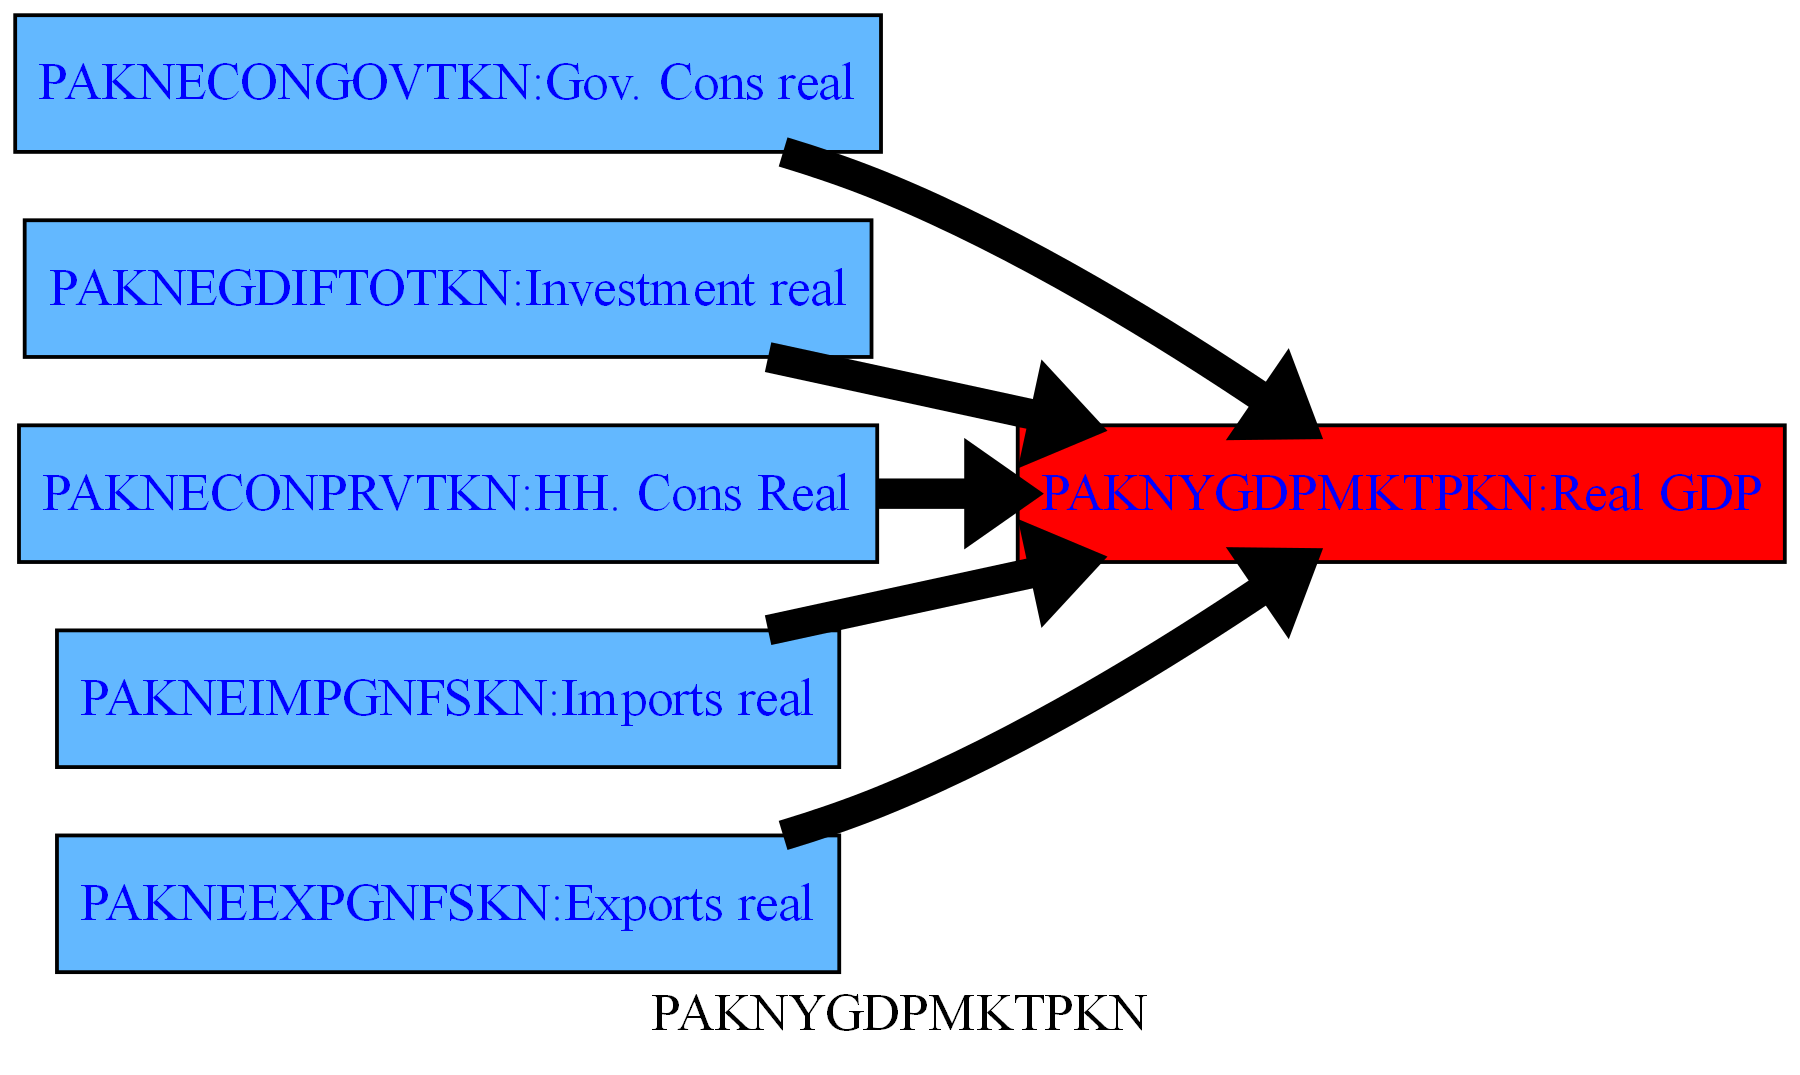

In [8]:
gg=mpak.PAKNYGDPMKTPKN.tracepre(filter=20,png=latex)
gg

### .tracepre(,,,up=\<upstream levels>) 
Combined with filter we can look behind the dependencies 

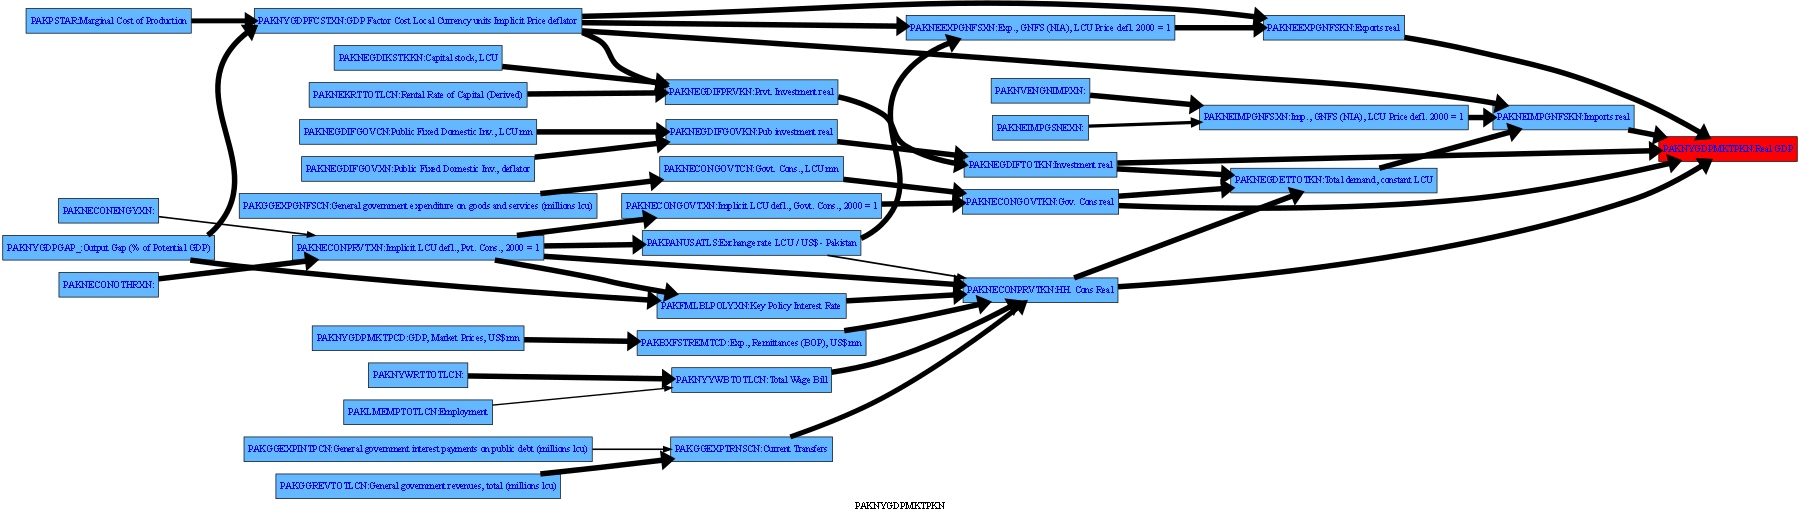

In [12]:
mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,up=3,png=latex,)

### tracepre(,fokus2=\<variable pattern>,growthshow=True) Additional information regarding selected variables
The data for selected nodes can be displayed by mentioning the variable in fokus2=\<variable pattern>.<br>
To also show growth rates, growthshow=True can be specified. 

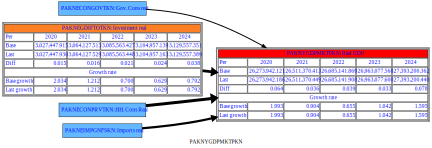

In [10]:
with mpak.set_smpl(2020,2024):
    mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,fokus2='PAKNEGDIFTOTKN PAKNYGDPMKTPKN',growthshow=True)

## .tracedep match .tracepre for downstream (dependent variables) 

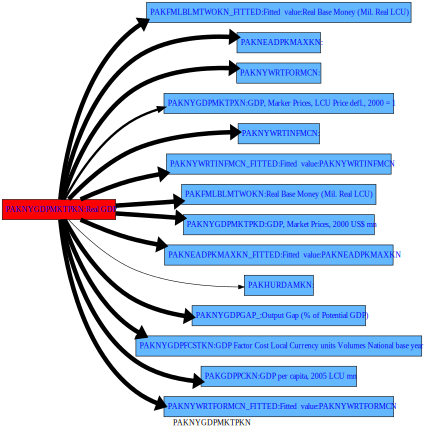

In [13]:
mpak.PAKNYGDPMKTPKN.tracedep()

## .modeldash() The really convenient  way to navigate the dependency graph
This is the way to navigate the dependency graph. You can point and click and much more.

Unfortunately you can not run this facility from this manual. It only works in a live notebook on your local computer. 

In [14]:
try:
    with mpak.set_smpl(2022,2026):
        mpak.modeldash('PAKNYGDPMKTPKN',jupyter=True,inline=False)  # delete # if running a live notebook 
except Exception as e:
    print(f"Can't show modeldash \n{e}")

No Dash
No Dash, name 'DashInteractiveGraphviz' is not defined


And it will look like this 

![dash.png](dash.png)

## Plot the adjacency matrix for current periode
Another way to display the logical graph is as an [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix). 

This is the structure of the graph of  endogenous variables.

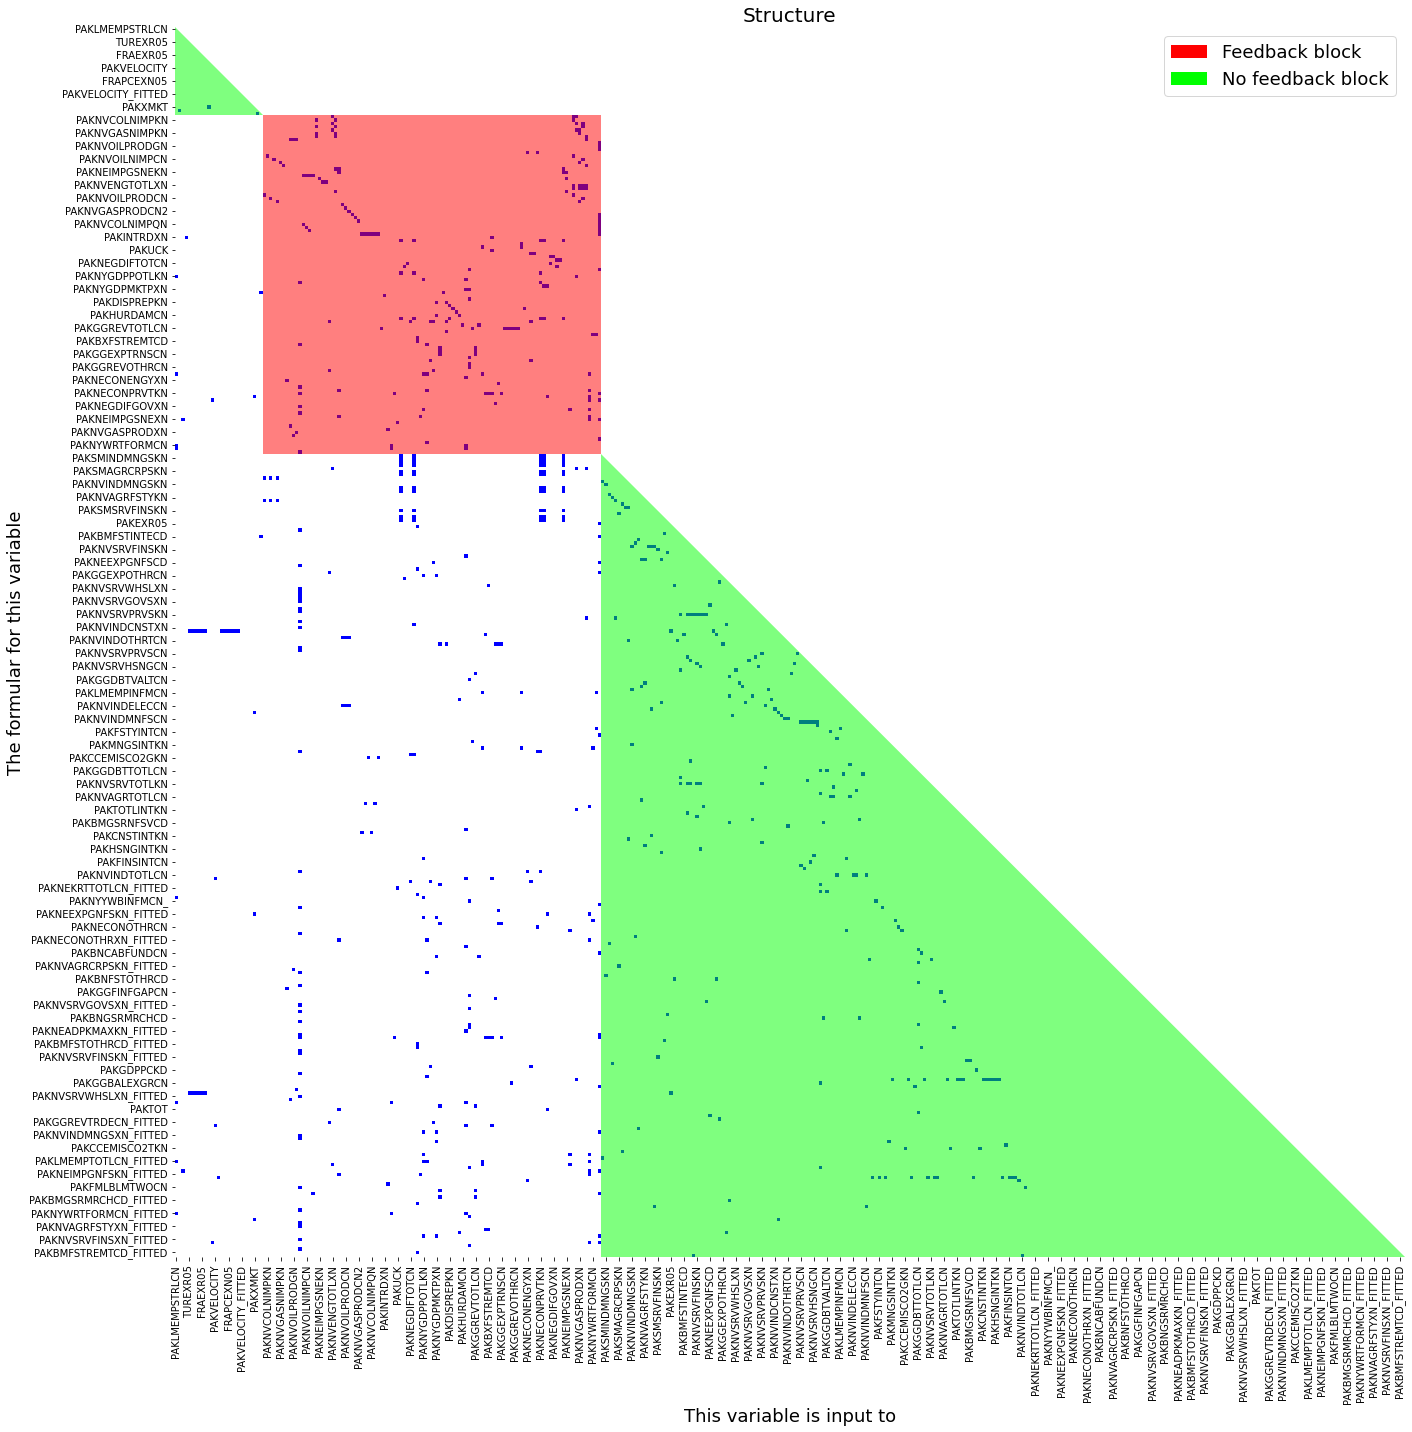

In [15]:
mpak.plotadjacency(size=(20,20),nolag=0);

## Plot the adjacency matrix including lagged effects


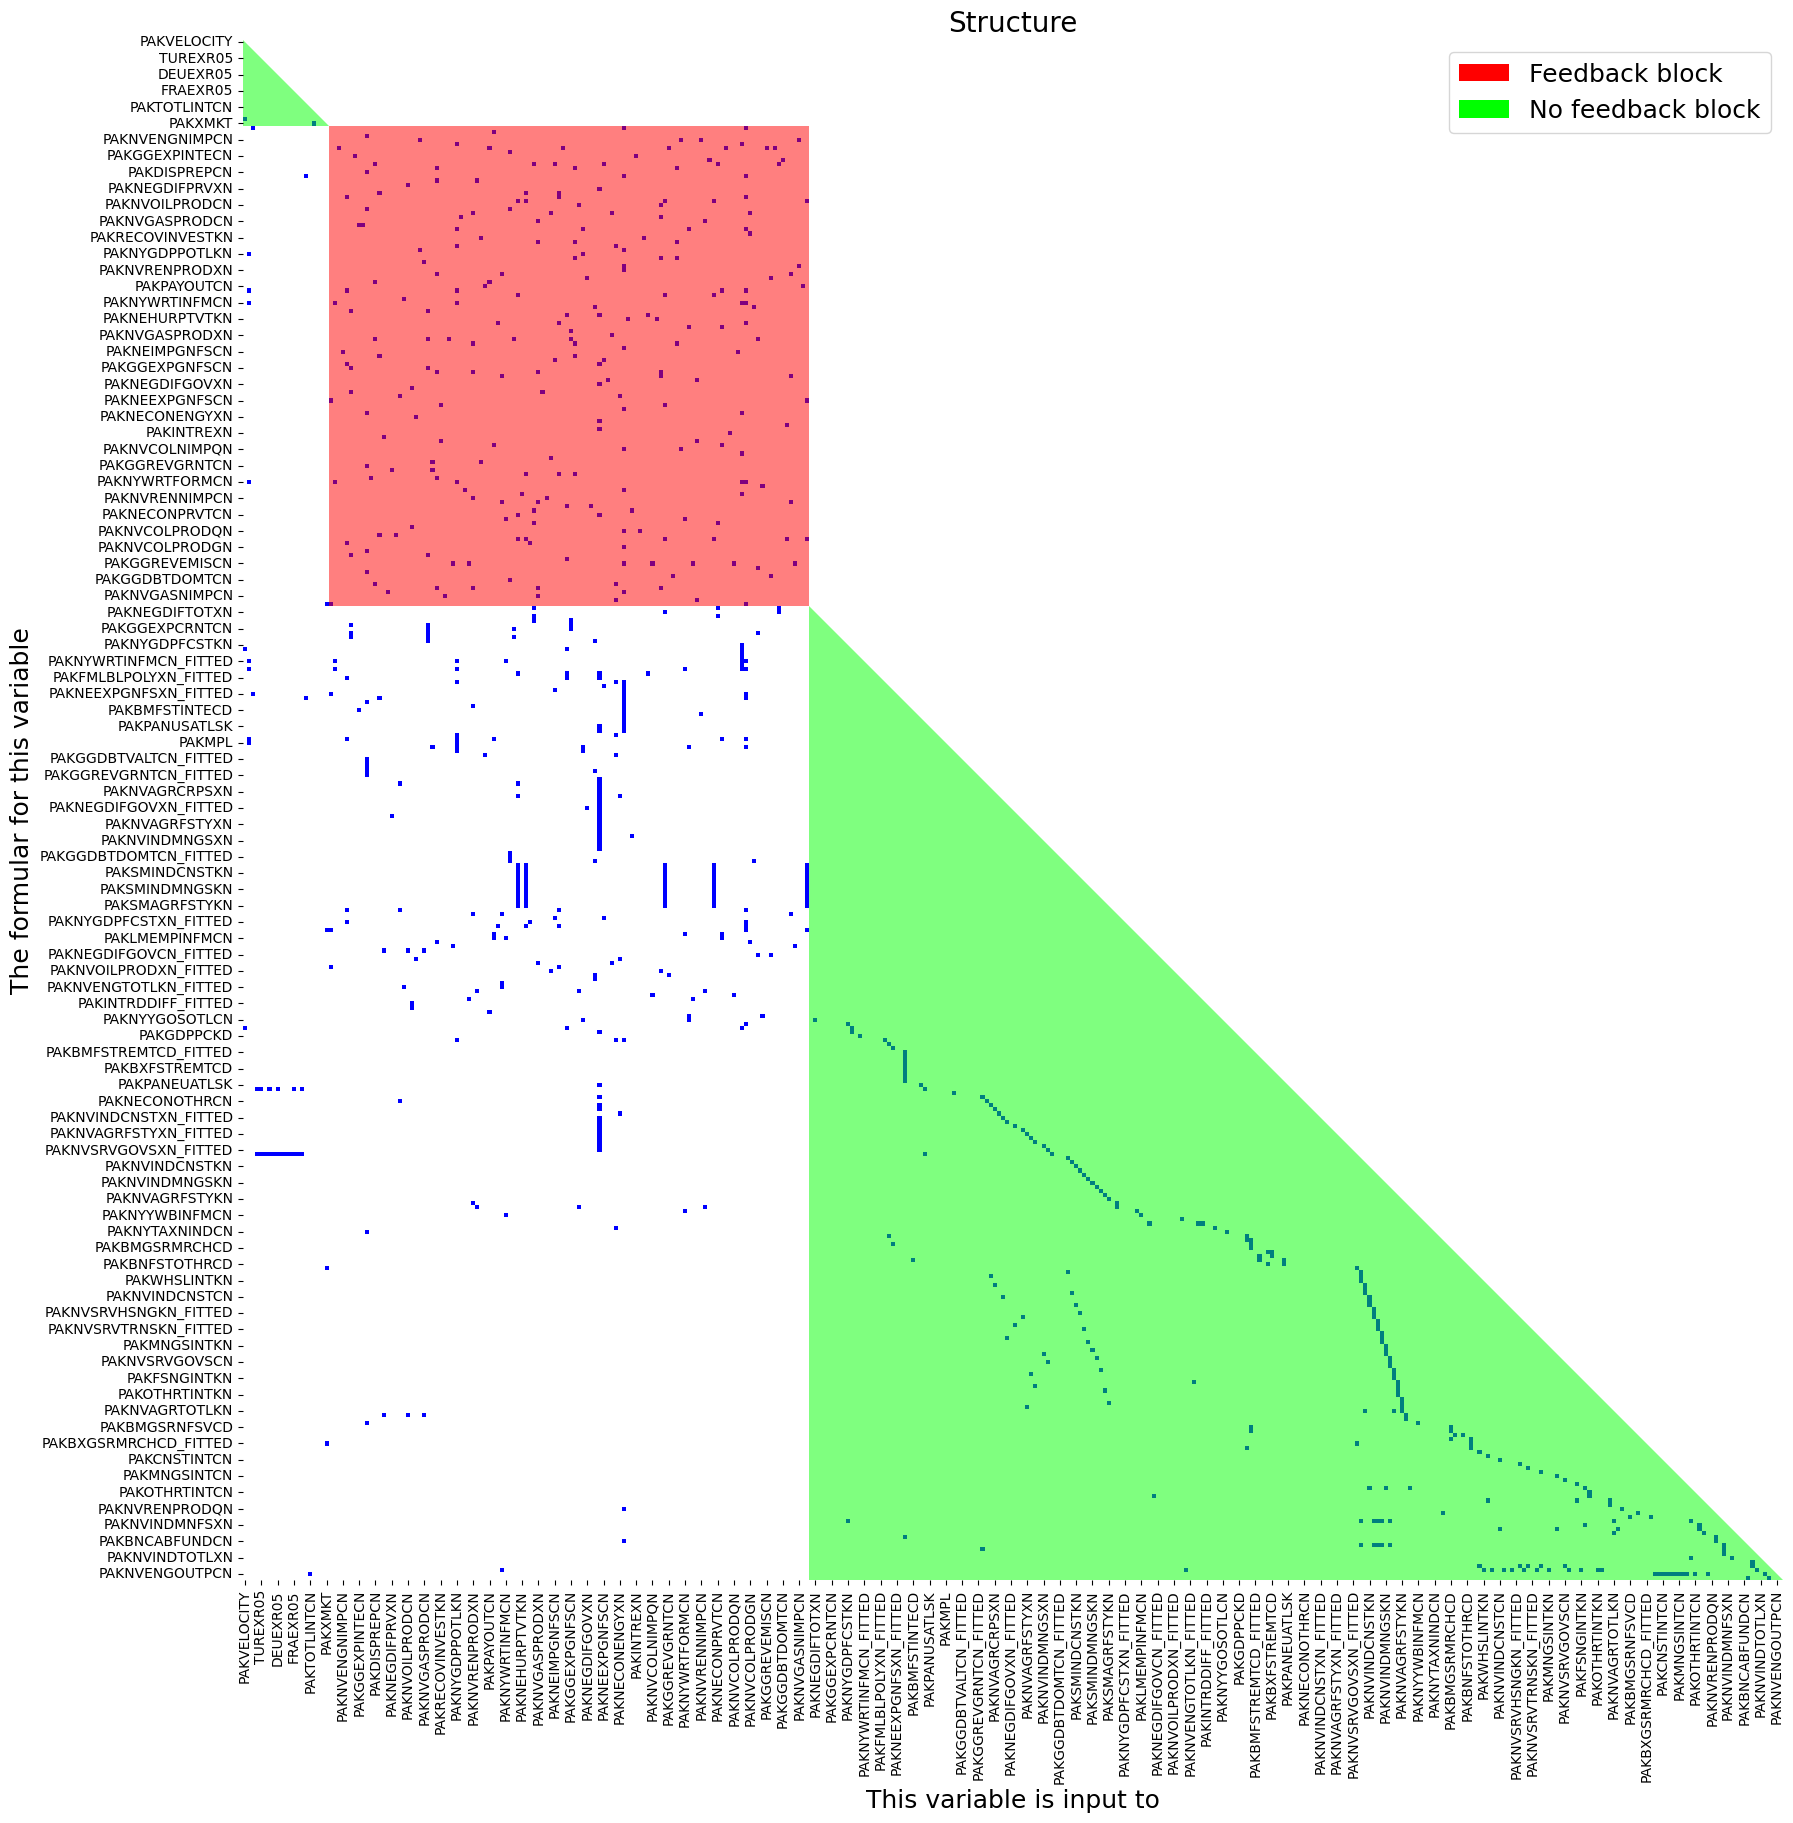

In [12]:
mpak.plotadjacency(size=(20,20),nolag=1);